In [ ]:
import pandas as pd
import numpy as np
import math as math
import os
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
url = "mushrooms.csv"
df1 = pd.read_csv(url)
display(df1)

,TARGET(Poison = P or Edible= E),cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
dfwithvalue = df1.drop('TARGET(Poison = P or Edible= E)',axis=1).copy()
display(dfwithvalue)
dfwithtarget = df1["TARGET(Poison = P or Edible= E)"].copy()
dfwithtarget.columns = ["TARGET(Poison = P or Edible= E)"]
dfwithtarget = pd.DataFrame(dfwithtarget)
dfwithtarget = dfwithtarget.replace('e', 1)
dfwithtarget = dfwithtarget.replace('p', 0)

dfwithtarget = dfwithtarget.astype("int")
display(dfwithtarget)
print(dfwithvalue.columns)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


,TARGET(Poison = P or Edible= E)
0,0
1,1
2,1
3,0
4,1
...,...
8119,1
8120,1
8121,1
8122,0


Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


                             0
ccp_alpha                  0.0
class_weight              None
criterion                 gini
max_depth                 None
max_features              None
max_leaf_nodes            None
min_impurity_decrease      0.0
min_samples_leaf             1
min_samples_split            2
min_weight_fraction_leaf   0.0
random_state                42
splitter                  best


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


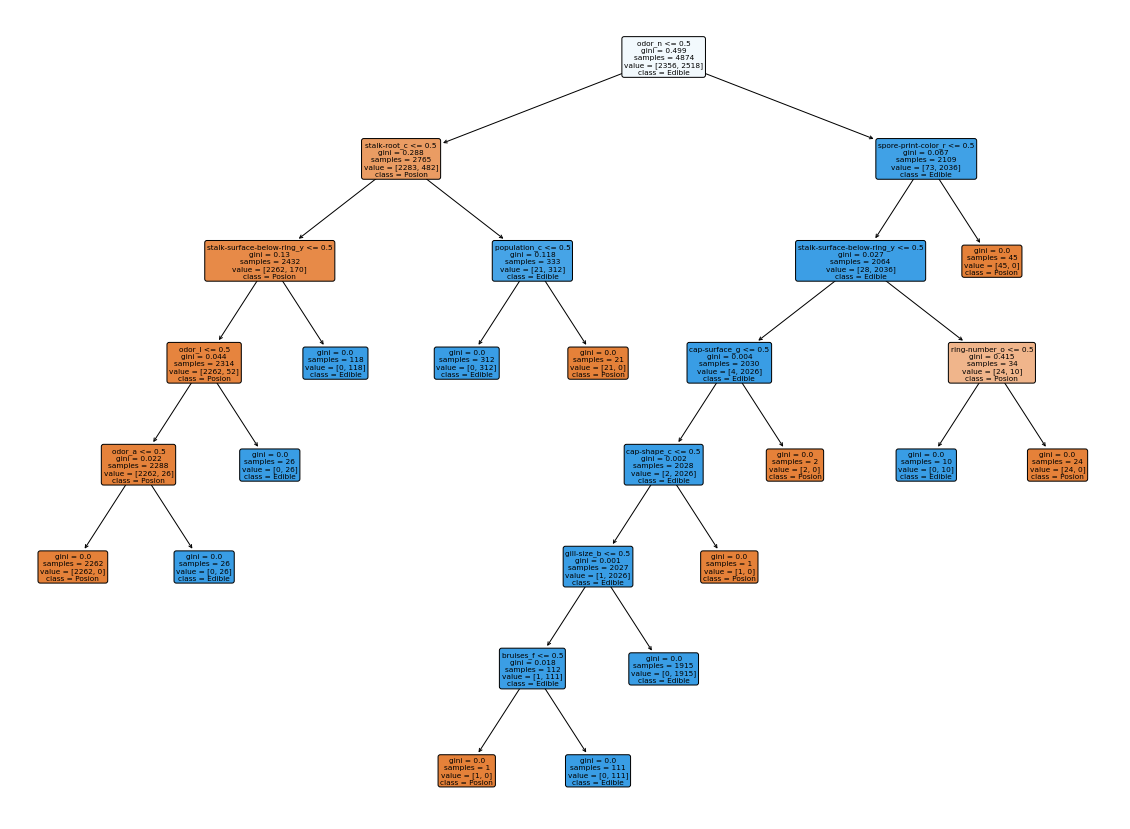

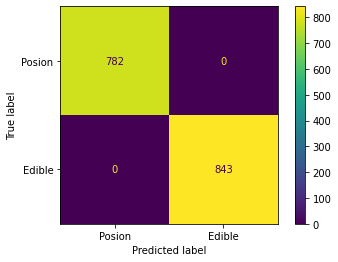

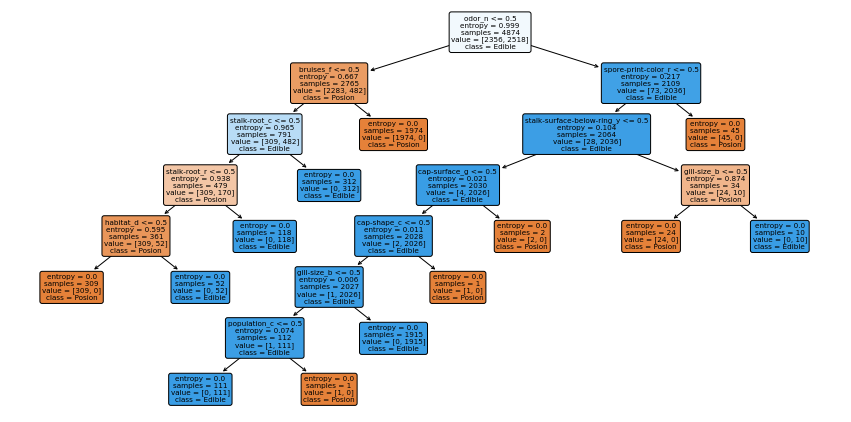

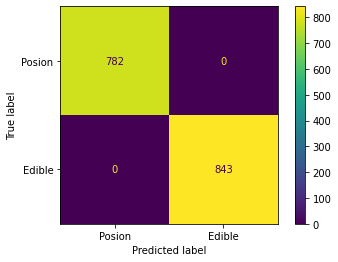

In [ ]:
dfwithvalueadj = pd.get_dummies(dfwithvalue, columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])



x_train, x_test, y_train, y_test = train_test_split(dfwithvalueadj,dfwithtarget,test_size = .2,train_size = .6,random_state = 42)

treegini = DecisionTreeClassifier(random_state = 42)
treegini = treegini.fit(x_train, y_train)
treeginipred = treegini.predict(x_test)
tngini, fpgini, fngini, tpgini = confusion_matrix(y_test,treeginipred).ravel()
sensitivitygini = tngini/(tngini + fpgini)
specificitygini = tpgini/(tpgini + fngini)
f1gini = tpgini/(tpgini + .5 *( fpgini + fngini))
fprgini, tprgini, thresholds = metrics.roc_curve(y_test, treeginipred)
aucgini = metrics.auc(fprgini, tprgini)
accuracygini = accuracy_score(y_test,treeginipred)



plt.figure(figsize = (20, 15))
plot_tree(treegini,filled = True,rounded = True, class_names = ["Posion","Edible"],feature_names=dfwithvalueadj.columns)
plot_confusion_matrix(treegini,x_test,y_test,display_labels = ["Posion","Edible"])

treeentropy = DecisionTreeClassifier(criterion = "entropy",random_state = 42)
treeentropy = treeentropy.fit(x_train, y_train)
treeentropypred = treeentropy.predict(x_test)
tnentropy, fpentropy, fnentropy, tpentropy = confusion_matrix(y_test,treeentropypred).ravel()
sensitivityentropy = tnentropy/(tnentropy + fpentropy)
specificityentropy = tpentropy/(tpentropy + fnentropy)
f1entropy = tpentropy/(tpentropy + .5 *( fpentropy + fnentropy))
fprentropy, tprentropy, thresholds = metrics.roc_curve(y_test, treeentropypred)
aucentropy = metrics.auc(fprentropy, tprentropy)
accuracyentropy = accuracy_score(y_test,treeentropypred)

plt.figure(figsize = (15, 7.5))
plot_tree(treeentropy,filled = True,rounded = True, class_names = ["Posion","Edible"],feature_names=dfwithvalueadj.columns)
plot_confusion_matrix(treeentropy,x_test,y_test,display_labels = ["Posion","Edible"])

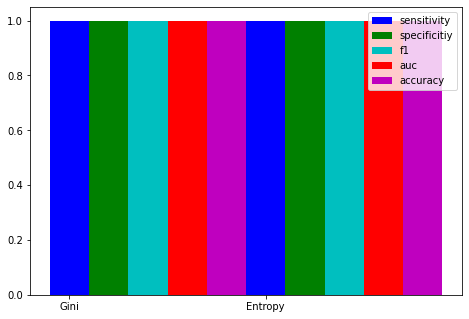

In [ ]:
X = ['Gini', 'Entropy']
Performance = ["sensitivity","specificitiy","f1",'auc','accuracy']
sensitivity = [sensitivitygini,sensitivityentropy]
specificity = [specificitygini,specificityentropy]
f1 = [f1gini,f1entropy]
auc = [aucgini,aucentropy]
accuracy = [accuracygini, accuracyentropy ]
X_axis = np.arange(len(X))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X_axis + 0.0, sensitivity,  0.2,color = 'b', label = "sensitivity" )
ax.bar(X_axis + 0.2, specificity,  0.2,color = 'g', label = "specificity" )
ax.bar(X_axis + 0.4, f1,  0.2,color = 'c', label = "f1")
ax.bar(X_axis + 0.6, auc, 0.2, color = 'r', label = "auc" )
ax.bar(X_axis + 0.8, accuracy, 0.2, color = 'm', label = "accuracy" )

plt.xticks(X_axis, X)
plt.legend(Performance)
fig.savefig('plot.png')

In [ ]:
outname = 'decisontree.cvs'
outdir = 'EXPORTS'
if not os.path.exists(outdir):
  os.mkdir(outdir)
tree = pd.DataFrame.from_dict(treegini.get_params(), orient = 'index')
tree.to_csv(f"{outdir}/{outname}") 
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/output.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  tree.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
